# Business Understanding

### *Predictive Modeling for Store Sales at Corporation Favorita*

#### *Project Description*

Accurate sales forecasting is crucial for optimizing inventory, resource allocation, and strategic decision-making in the fast-paced retail sector. This project explores time series forecasting for store sales, with the goal of developing a reliable predictive model for Favorita, a prominent grocery retailer based in Ecuador. Utilizing data and advanced analytics, we aim to refine Favorita's operations, elevate customer satisfaction, and stimulate business growth.

#### *Business Understanding*

The primary goal of this project is to create a robust and precise time series forecasting model to predict store sales for various products across Favorita stores. By utilizing historical sales data and pertinent supplementary information, the model aims to deliver dependable forecasts, empowering Favorita to optimize inventory management, resource allocation, and marketing strategies. The successful deployment of this model will lead to enhanced operational efficiency, better decision-making, and increased profitability for the retailer.

#### Business Goals
1. Increase operational efficiency by optimizing inventory management, reducing lead times, and increasing sales per customer.
2. Stimulate business growth by attracting new customers and increasing customer satisfaction.
3. Enhance marketing strategies by optimizing promotional and sales channels, and increasing customer loyalty.

 **Success Criteria**
- Achieve a 0.2 RMSE (Root Mean Squared Error) in sales forecasting models.
- Improve inventory management efficiency and reduce stockout instances.

 **Constraints and Assumptions**
- Assumption: Historical sales data is representative of future demand patterns.
- Constraint: Limited availability of real-time sales data for model training.

 **Data Requirements**
- Utilize data from train.csv, stores.csv, holidays_events.csv, oil.csv, and transaction.csv for analysis.
- Include features such as store_nbr, family, onpromotion, store metadata, oil prices, holidays, and transactional data.


#### *Hypothesis Statement*

Null Hypothesis (H0): The promotional activities have a significant impact on store sales for Corporation Favorita.

Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales for Corporation Favorita.

#### *Analytical Questions*

1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year (excluding days the store was closed)?
3. Compare the sales for each month across the years and determine which month of which year had the highest sales.
4. Did the earthquake impact sales?
5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)
6. Are sales affected by promotions, oil prices and holidays?
7. What analysis can we get from the date and its extractable features?
8. Which product family and stores did the promotions affect.
9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)
10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

## *Data Understanding*

##### File Descriptions and Data Field Information

**train.csv**

- The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.

- store_nbr identifies the store at which the products are sold.

- family identifies the type of product sold.

- sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

- onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

**test.csv**

- The test data, having the same features as the training data. You will predict the target sales for the dates in this file.

- The dates in the test data are for the 15 days after the last date in the training data.

**transaction.csv**

- Contains date, store_nbr and transaction made on that specific date.

**sample_submission.csv**

- A sample submission file in the correct format.

**stores.csv**

- Store metadata, including city, state, type, and cluster.

- cluster is a grouping of similar stores.

**oil.csv**

- Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

###### 
**holidays_events.csv**
Holidays and Events, with metadata

NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was celebrated, look for the corresponding row where type is Transfer.

For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

**Additional Notes**

- Wages in the public sector are paid every two weeks on the 15th and on the last day of the month. Supermarket sales could be affected by this.

- A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.

#### *Libraries Installation*

In [ ]:
# install libraries
%pip install pandas
%pip install numpy 
%pip install matplotlib 
%pip install seaborn
%pip install pyodbc
%pip install scikit-learn
%pip install imbalanced-learn
%pip install plotly 
%pip install python-dotenv
%pip install --upgrade nbformat
%pip install statsmodels





#### *Libraries Importation*

In [155]:
# Data Handling
import pyodbc
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.widgets import Slider  
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle


# Other Packages
import warnings

warnings.filterwarnings("ignore")

#### *Setup database connection*

In [156]:

# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the .env
server = environment_variables.get('SERVER')
database = environment_variables.get('DATABASE')
username = environment_variables.get('UID')
password = environment_variables.get('PWD')

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
 
connection = pyodbc.connect(connection_string)

#### *load all dataset*

In [157]:
# load the oil dataset from sql server
query1="SELECT * FROM dbo.oil"
oil_df=pd.read_sql(query1, connection)
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [158]:
# load the holiday dataset from sql server
query2="SELECT * FROM dbo.holidays_events"
holidays_df=pd.read_sql(query2, connection)
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [159]:
# load the stores dataset from sql server
query3="SELECT * FROM dbo.stores"
stores_df=pd.read_sql(query3, connection)
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [160]:
# load the transaction dataset from csv file
transactions_df = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Lp3/Time-Series-Regression-Analysis-Corporation-Favorita/data/transactions.csv')
transactions_df 

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


### Load the train and test dataset

In [161]:
# load the train dataset from csv file 
train_df = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Lp3/Time-Series-Regression-Analysis-Corporation-Favorita/data/train.csv')
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [162]:
test_df = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/Lp3/Time-Series-Regression-Analysis-Corporation-Favorita/data/test.csv')
test_df

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


#### *Convert the date columns with string data type to date using to_date function*

- data1 has 2 columns, data2 has 6 columns while data 3 has 5
- data1 contains 43 null values while data2 and data3 has no missing values

### *Exploratory Data Analysis*

#### *Understanding the dataset*

##### *shape of the dataset*

In [163]:
# Print out the shapes of the train and test datasets
print(f"Train Dataset: {train_df.shape}")
print(f"Test Datasets: {test_df.shape}")


Train Dataset: (3000888, 6)
Test Datasets: (28512, 5)


The train dataset contains 3,000,888 rows and 6 columns while the test dataset contains 28,512 rows and 5 columns.

The train dataset is significantly larger than the test dataset in terms of the number of rows. This is expected, as the train dataset is usually larger to provide sufficient data for model training.

In [164]:
# Print out the shapes of the other datasets
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {holidays_df.shape}")
print(f"Oil Dataset: {oil_df.shape}")
print(f"Stores Dataset: {stores_df.shape}")
print(f"Transactions Dataset: {transactions_df.shape}")

Shapes of Each Dataset:
Holiday Events Dataset: (350, 6)
Oil Dataset: (1218, 2)
Stores Dataset: (54, 5)
Transactions Dataset: (83488, 3)


- The Holiday Events dataset comprises 350 rows and 6 columns, offering details about various holidays and events.
- The Oil dataset includes 1,218 rows and 2 columns, providing daily oil price information.
- The Stores dataset features 54 rows and 5 columns, detailing different stores, including their locations, types, and clusters.
- The Transactions dataset consists of 83,488 rows and 3 columns, capturing the number of transactions made at each store on specific dates.

##### *Column information of the dataset*

In [165]:
# Get the column information of each dataset
# Function to display column information of the datasets
def show_column_info(dataset_name, dataset):
    print(f"Data types for the {dataset_name} dataset:")
    print(dataset.info())
    print('==='*140)

In [166]:
# Column information of the train and test columns
show_column_info('Train', train_df)
print()
show_column_info('Test', test_df)

Data types for the Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Data types for the Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None


- The train dataset contains 3,000,888 entries and 6 columns: 'id', 'date', 'store_nbr', 'family', 'sales', and 'onpromotion'.
- The test dataset contains 28,512 entries and 5 columns: 'id', 'date', 'store_nbr', 'family', and 'onpromotion'.
- The "date" column in both datasets of type object. It needs to be converted to a datetime data type for further analysis.
- As expected, the test dataset does not have the "sales" column. This column is not needed because 'sales' is the variable we want to predict. The goal is to use the trained model to predict or forecast the sales in the test data based on the other available features.

In [167]:
# Column information of the other datasets
show_column_info('Holiday events', holidays_df)
print()
show_column_info('Oil', oil_df)
print()
show_column_info('Stores', stores_df)
print()
show_column_info('Transactions', transactions_df)

Data types for the Holiday events dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

Data types for the Oil dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

Data types for the Stores dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Dat

The Holiday  Dataset:
- The dataset contains 350 entries and 6 columns: 'date', 'type', 'locale', 'locale_name', 'description', and 'transferred'.
- The "date" column in the dataset is of type object. It needs to be converted to a datetime data type for further analysis.

The Oil Dataset:

- The dataset contains 1,218 entries has 2 columns: 'date' and 'dcoilwtico'.
- The "date" column in the dataset is of type object. It needs to be converted to a datetime data type for further analysis.
- The 'dcoilwtico' column has 1,175 non-null values, indicating that there are some missing values in this column.

The Stores dataset:

- The dataset contains 54 entries and 5 columns: 'store_nbr', 'city', 'state', 'type', and 'cluster'.

The Transactions dataset:

- The dataset contains 83,488 entries and 3 columns: 'date', 'store_nbr', and 'transactions'.
- The "date" column in the dataset is of type object. It needs to be converted to a datetime data type for further analysis.


##### *Transform the 'date' column to datetime format*

In [168]:
# Converting the 'date' column in the datasets to datetime format
# Train dataset
train_df['date'] = pd.to_datetime(train_df['date'])

# Test dataset
test_df['date'] = pd.to_datetime(test_df['date'])

# Holiday Events dataset
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

# Oil dataset
oil_df['date'] = pd.to_datetime(oil_df['date'])

# Transactions dataset
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

In [169]:
# Confirm the data type of the 'date' column after transformation
print('Date Column Data Type After Transformation:') 
print('==='*14)
print("Train dataset:", train_df['date'].dtype)
print("Test dataset:", test_df['date'].dtype)
print("Holiday Events dataset:", holidays_df['date'].dtype)
print("Oil dataset:", oil_df['date'].dtype)
print("Transactions dataset:", transactions_df['date'].dtype)

Date Column Data Type After Transformation:
Train dataset: datetime64[ns]
Test dataset: datetime64[ns]
Holiday Events dataset: datetime64[ns]
Oil dataset: datetime64[ns]
Transactions dataset: datetime64[ns]


##### *Summary Statistics*

In [170]:
# Checking for the summary statistics of the datasets 
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df}

for name, data in datasets.items():
    print(f"{name.capitalize()} dataset summary statistics:")
    print('---'*15)
    print(data.describe())
    print('==='*20)
    print()


Train dataset summary statistics:
---------------------------------------------
                 id                           date     store_nbr  \
count  3.000888e+06                        3000888  3.000888e+06   
mean   1.500444e+06  2015-04-24 08:27:04.703088384  2.750000e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    7.502218e+05            2014-02-26 18:00:00  1.400000e+01   
50%    1.500444e+06            2015-04-24 12:00:00  2.750000e+01   
75%    2.250665e+06            2016-06-19 06:00:00  4.100000e+01   
max    3.000887e+06            2017-08-15 00:00:00  5.400000e+01   
std    8.662819e+05                            NaN  1.558579e+01   

              sales   onpromotion  
count  3.000888e+06  3.000888e+06  
mean   3.577757e+02  2.602770e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    1.100000e+01  0.000000e+00  
75%    1.958473e+02  0.000000e+00  
max    1.247170e+05  7.410000e+02  
std    1.101998e+03

##### *check for missing values*

In [171]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df, }

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in the Test dataset:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing values in the Holiday events dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing values in the Oil dataset:
date           0
dcoilwtico    43
dtype: int64

Missing values in the Stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in the Transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64



Among all the columns in the various datasets, only the 'dcoilwtico' column (daily crude oil prices) in the Oil dataset has missing values. This column has 43 missing values.

##### *handling the missing values in dcoilwtico column*

##### *fill the missing value with backfill strategy*

In [172]:
# Fill missing values in the 'dcoilwtico' column using backfill strategy
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method='backfill')

In [173]:
# Check for missing values after handling
missing_values_after = oil_df['dcoilwtico'].isnull().sum()
missing_values_after

np.int64(0)

##### *check for the completeness of the date column in the dataset*

In [174]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [175]:
#Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

# Concatenate the original train dataset and the missing data DataFrame
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train_df = pd.concat([train_df, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train_df.sort_values('date', inplace=True)

In [176]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


##### *Merge the train_df with stores_df,holidays_df,transactions_df and oil_df*

In [177]:
# Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
# Merge train_df with stores_df based on 'store_nbr' column
merged_df1 = train_df.merge(stores_df, on='store_nbr', how='inner')

# Merge merged_df1 with transactions_df based on 'date' and 'store_nbr' columns
merged_df2 = merged_df1.merge(transactions_df, on=['date', 'store_nbr'], how='inner')

# Merge merged_df2 with holidays_events_df based on 'date' column
merged_df3 = merged_df2.merge(holidays_df, on='date', how='inner')

# Merge merged_df3 with oil_df based on 'date' column
merged_df = merged_df3.merge(oil_df, on='date', how='inner')

# View the first five rows of the merged dataset
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999


Using an inner merge in this time series forecasting project for Favorita Corporation ensures data consistency, avoids missing values, and focuses on relevant data for accurate predictions.

An inner merge retains only the rows with matching values in the specified columns. In the context of time series forecasting, this means merging datasets based on a common time index or timestamp. By performing an inner merge, we ensure that only the rows with corresponding timestamps in both datasets are included in the merged result. This alignment of data from different sources based on their timestamps is crucial for building a consistent and accurate forecasting model.

With an inner merge, we eliminate any non-matching timestamps, which may not be useful for forecasting and could introduce inconsistencies in the data. By focusing on the intersection of the datasets, we create a merged dataset that contains the necessary information for accurate time series forecasting.

In [178]:
# Check the column information of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

The merged dataset after merging the train dataset with additional datasets contains 322,047 rows and 16 columns. Two columns have been renamed as a result of the merging, type_x and type_y.

In [179]:
# Check the unique values of the two unknown columns
print("Unique values of 'type_x':")
print(merged_df['type_x'].unique())
print()
print("Unique values of 'type_y':")
print(merged_df['type_y'].unique())

Unique values of 'type_x':
['D' 'E' 'C' 'A' 'B']

Unique values of 'type_y':
['Holiday' 'Additional' 'Transfer' 'Event' 'Bridge']


The merged dataset consists of 322,047 non-null observations. Two columns have been renamed as a result of the merge: `type_x` and `type_y`.

- The `type_x` column represents the store type.
- The `type_y` column represents the holiday type.

In [180]:
# Renaming the columns with the approapriate names
merged_df = merged_df.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999


In [181]:
# Generate summary statistics and transpose the rows and columns of the resultant DataFrame.
# Transposing flips the DataFrame (the rows become columns and the columns become rows) for better readability
merged_df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,322047.0,1682979.459576,561.0,1010616.5,1842406.0,2209555.5,3000887.0,786249.257767
date,322047,2015-08-04 23:49:57.971104,2013-01-01 00:00:00,2014-07-23 00:00:00,2015-11-02 00:00:00,2016-05-27 00:00:00,2017-08-15 00:00:00,NaN
store_nbr,322047.0,26.994672,1.0,13.0,27.0,40.0,54.0,15.595174
sales,322047.0,406.383452,0.0,1.0,19.0,241.260505,124717.0,1246.88124
onpromotion,322047.0,3.727136,0.0,0.0,0.0,1.0,716.0,15.512095
cluster,322047.0,8.531202,1.0,4.0,9.0,13.0,17.0,4.713809
transactions,322047.0,1734.11784,54.0,1030.0,1409.0,2148.0,8359.0,1050.335018
dcoilwtico,322047.0,63.636381,27.959999,44.880001,51.98,94.089996,107.949997,24.855753


##### *CHECK FOR MISSING VALUES*

In [182]:
# Check for missing values in the merged datasets
missing_values = merged_df.isnull().sum()
missing_values

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64

In [183]:
# Check for duplicate values in the merged dataset
duplicate_rows_merged = merged_df.duplicated()
duplicate_rows_merged.sum()

np.int64(0)

In [184]:
# Check for duplicate values in the test dataset
duplicate_rows_test = test_df.duplicated()
duplicate_rows_test.sum()

np.int64(0)

There is no missing value neither duplicates in the merge dataset

In [185]:
# Create A Copy of The Merged Dataset
merged_df_copy = merged_df.copy()
merged_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   store_type    322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  holiday_type  322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

### *Univariate,Multivariate,Bivariate Analysis*

### Univariate Analysis

##### *distribution of sales variable*

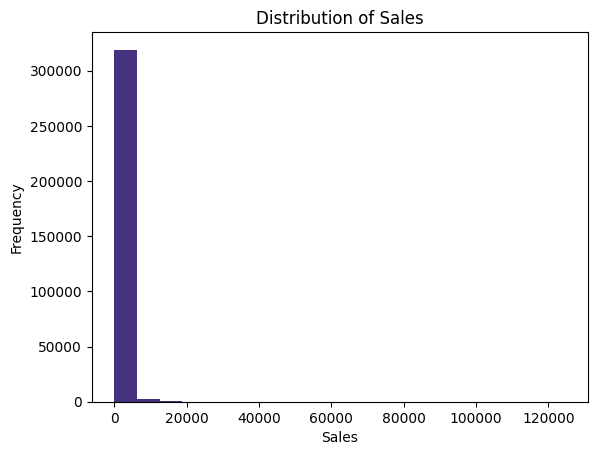

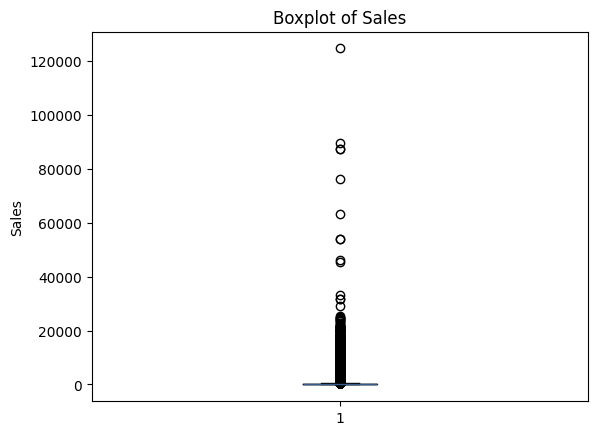

In [186]:
# Histogram
plt.hist(merged_df['sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

# Boxplot
plt.boxplot(merged_df['sales'])
plt.ylabel('Sales')
plt.title('Boxplot of Sales')
plt.show()

The histogram and boxplot of the 'sales' variable provide valuable insights into its distribution. The histogram displays the frequency distribution of sales values, indicating that most sales fall within a particular range, as evidenced by the peak. However, there are also instances of higher sales values, resulting in a right-skewed distribution. This skewness indicates that there are relatively fewer instances of very high sales, while the majority of sales are clustered around lower values. The boxplot further highlights the presence of outliers in the data, as shown by the points extending beyond the whiskers.

#### *distribution of transactions variables*

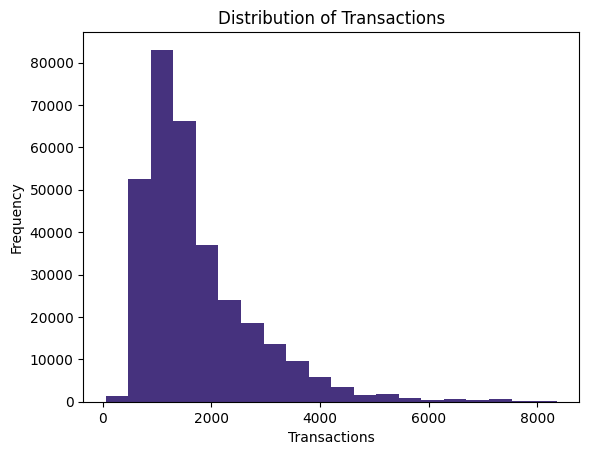

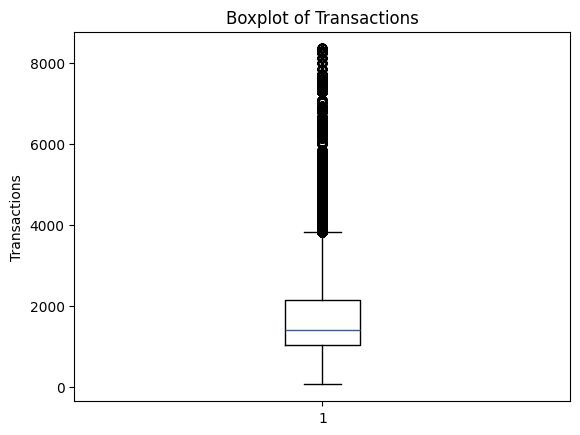

In [187]:
# Histogram
plt.hist(merged_df['transactions'], bins=20)
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions')
plt.show()

# Boxplot
plt.boxplot(merged_df['transactions'])
plt.ylabel('Transactions')
plt.title('Boxplot of Transactions')
plt.show()

This histogram provides insights into the distribution of transactions in the dataset. The shape of the histogram indicates that the majority of transactions fall within a specific range, as evidenced by the high frequency on the left side. As transaction volumes increase, the frequency gradually decreases, resulting in a right-skewed distribution. This suggests that there are relatively fewer instances of high transaction volumes. Overall, the histogram highlights a cluster of transactions with a lower frequency, revealing a discernible pattern in the data.

#### *distribution of daily oil prices variable*

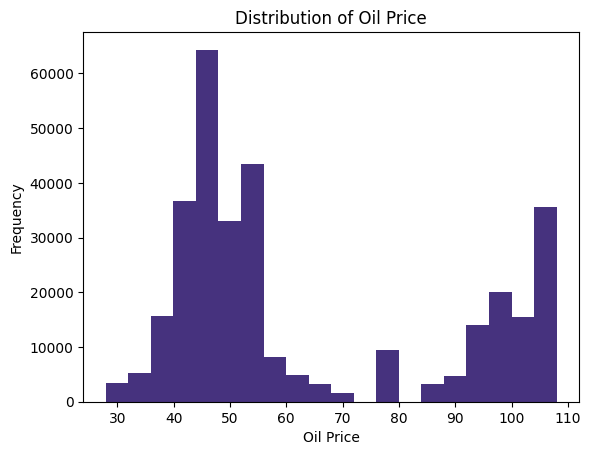

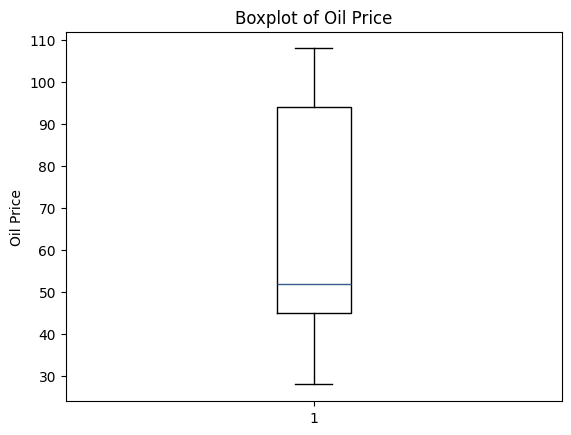

In [188]:
# Histogram
plt.hist(merged_df['dcoilwtico'], bins=20)
plt.xlabel('Oil Price')
plt.ylabel('Frequency')
plt.title('Distribution of Oil Price')
plt.show()

# Boxplot
plt.boxplot(merged_df['dcoilwtico'])
plt.ylabel('Oil Price')
plt.title('Boxplot of Oil Price')
plt.show()

The histogram and boxplot of the 'dcoilwtico' variable provide insights into its distribution. The histogram shows the frequency distribution of oil prices, indicating how often each price range occurs.

### *Bivariate Analysis*

##### *trend of sales over time*

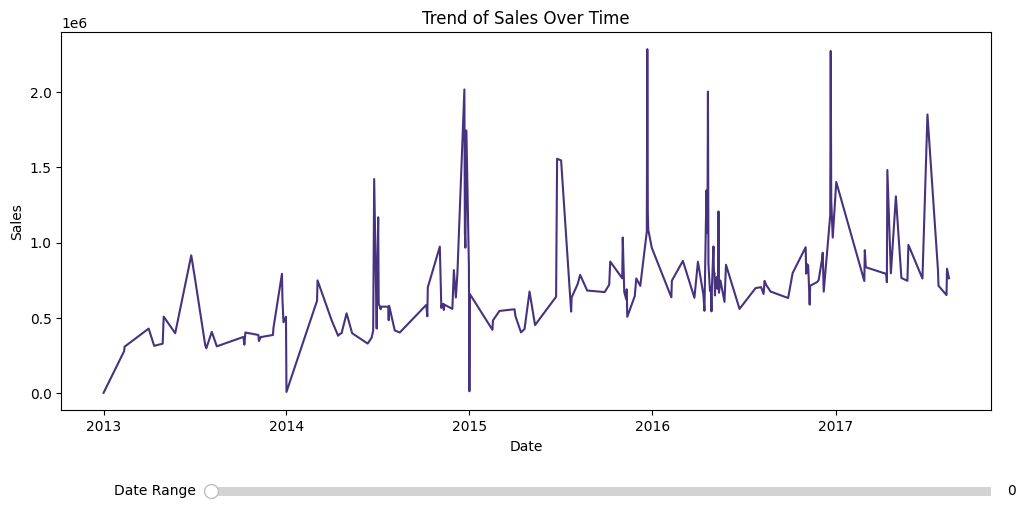

In [189]:
# Group the data by date and calculate the total sales
daily_sales = merged_df.groupby('date')['sales'].sum().reset_index()

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)  # Adjust the space for the slider

# Create the initial plot
line_plot = sns.lineplot(x='date', y='sales', data=daily_sales, ax=ax)
ax.set_title('Trend of Sales Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

# Add a slider for zooming in on specific date ranges
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Date Range', 0, len(daily_sales)-1, valinit=0, valstep=1)

def update(val):
    """Update the plot based on slider value"""
    start_idx = int(slider.val)
    end_idx = min(start_idx + 30, len(daily_sales))  # Display 30 days of data at a time
    subset = daily_sales.iloc[start_idx:end_idx]
    ax.clear()
    sns.lineplot(x='date', y='sales', data=subset, ax=ax)
    ax.set_title('Trend of Sales Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

The plot illustrates the trend of sales over time, revealing noticeable variations and fluctuations. It shows periods of both high and low sales, suggesting the presence of seasonality or other influencing factors affecting the sales patterns.

#### *Trend of daily crude oil price over time*

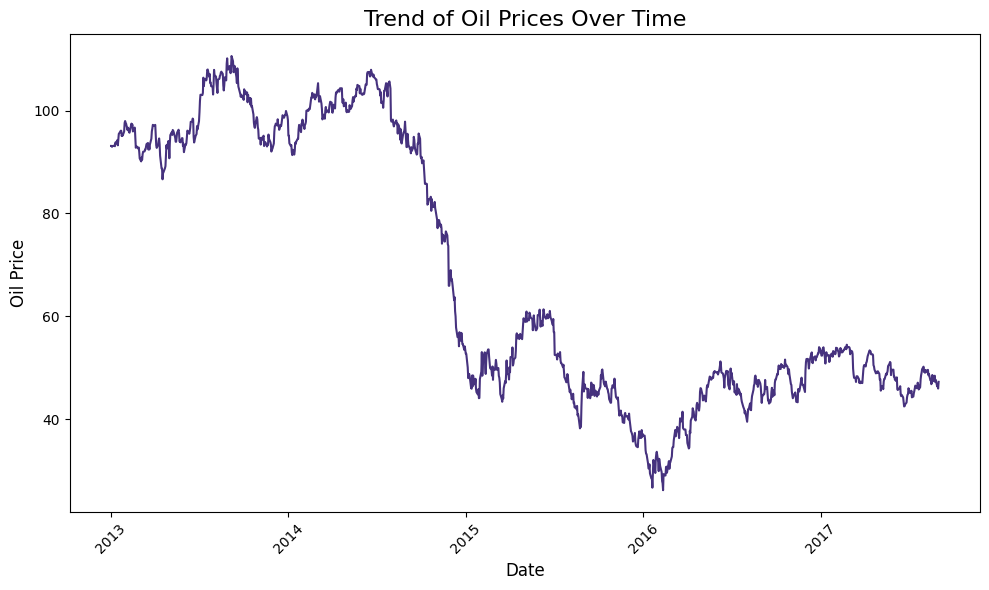

In [190]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=oil_df, x='date', y='dcoilwtico')

plt.title('Trend of Oil Prices Over Time', fontsize=16, loc='center')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Oil Price', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

plt.show()

The analysis reveals a clear trend in oil prices over time, with a notable collapse towards the end of 2014 that has persisted without significant recovery. Despite some fluctuations, oil prices remain at levels similar to early 2015. This decline in oil prices might suggest potential shifts in store sales around late 2014. However, unit sales data does not immediately reflect this trend. Sales appear to increase in late 2014 and exhibit a decline only in the early part of 2015. Furthermore, the lack of correlation between the drop in oil prices and sales indicates that oil prices do not significantly impact sales performance. Therefore, we can conclude that oil prices are not a relevant factor for our modeling purposes and will be excluded from further analysis.

#### *Total count of sales by store type*

In [191]:
# Set the color palette to "viridis"
sns.set_palette("viridis")

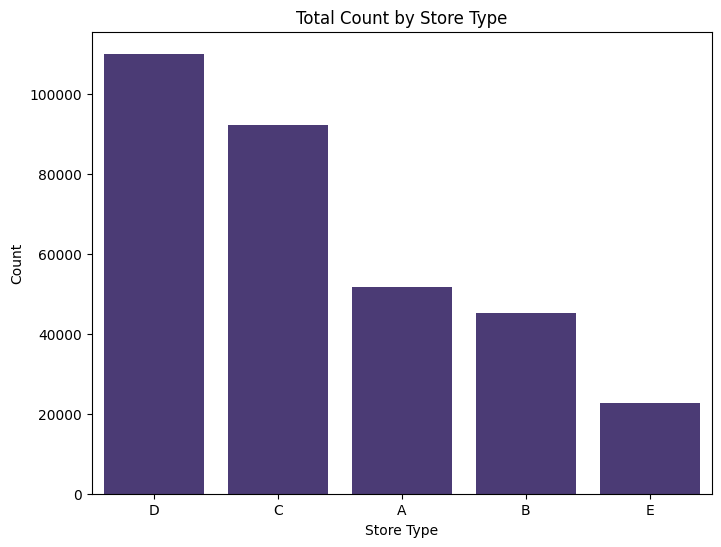

In [192]:
# Calculate the total count and total sales per store type
store_type_counts = merged_df['store_type'].value_counts()
store_type_sales = merged_df.groupby('store_type')['sales'].sum()

# Create a bar plot with "viridis" color palette for total count
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_counts.index, y=store_type_counts.values)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Total Count by Store Type')
plt.show()


The analysis of total sales counts by store type reveals distinct patterns in sales performance and customer demand. Store Type D emerges as the leader with the highest sales count, reflecting a strong customer base and high popularity of its products. Store Type C also shows a considerable sales count, indicating a significant customer following. In contrast, Store Types A, B, and E exhibit lower sales counts, highlighting potential areas for improvement or the need to address competitive challenges.

#### *Total amount in sales by store datatype*

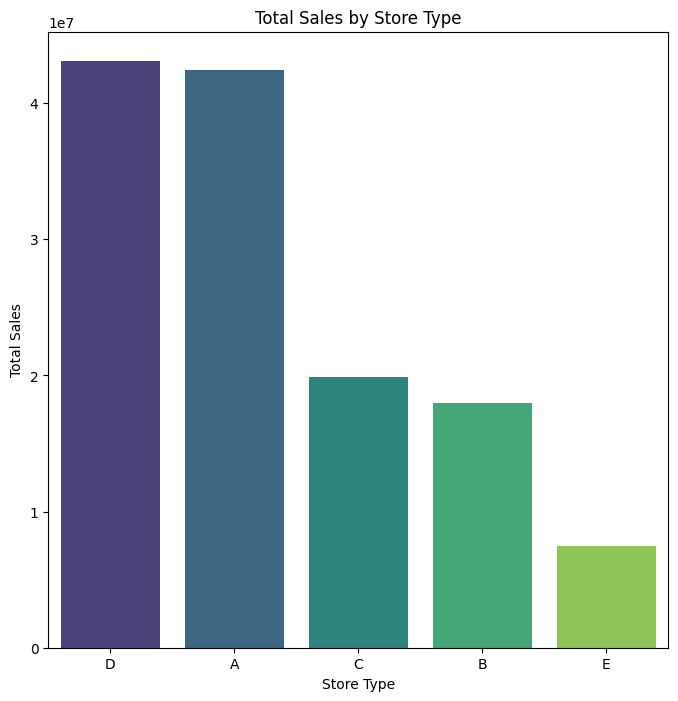

In [193]:
# Order the store types by total sales
store_type_sales = store_type_sales.sort_values(ascending=False)

# Create a bar plot with "viridis" color palette for total sales
plt.figure(figsize=(8, 8))
sns.barplot(x=store_type_sales.index, y=store_type_sales.values, order=store_type_sales.index, palette="viridis")
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store Type')
plt.show()

The total sales amount varies among different store types, with Store Type D leading in total sales and making a significant contribution to overall revenue. Store Type A closely follows, reflecting its strong sales performance. Store Type C ranks third in total sales, while Store Types B and E exhibit lower sales figures. Analyzing these variations helps pinpoint the key drivers of revenue and underscores the pivotal role that certain store types play in driving overall sales.

#### *Average sales by city*

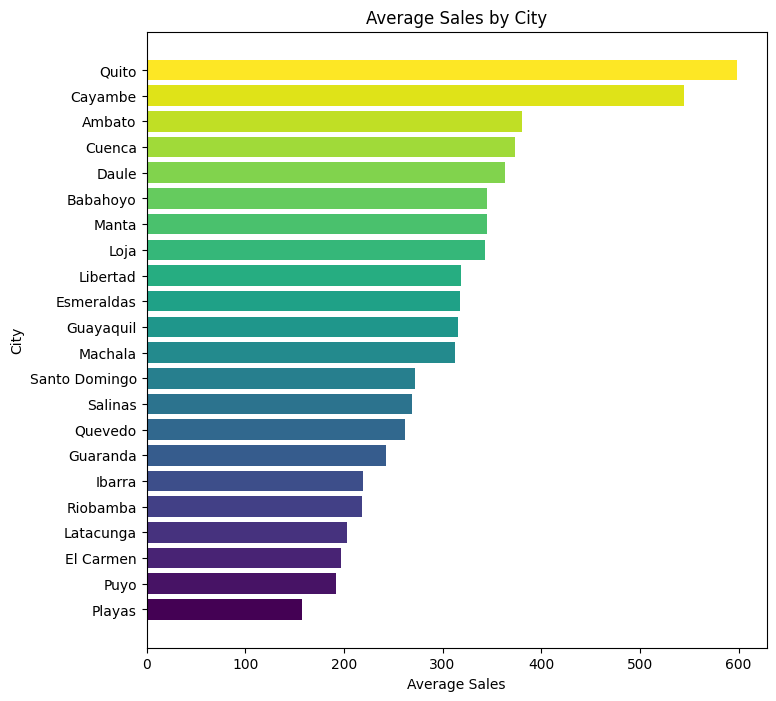

In [194]:
# Group by city and calculate the average sales
average_sales_by_city = merged_df.groupby('city')['sales'].mean()

# Sort the data by average sales in ascending order
average_sales_by_city = average_sales_by_city.sort_values(ascending=True)

# Define colors for the bar plot using 'viridis' color palette
colors = cm.viridis(np.linspace(0, 1, len(average_sales_by_city)))

# Plot the average sales by city horizontally
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_city.index, average_sales_by_city.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.title('Average Sales by City')
plt.show()


Quito leads with the highest number of stores, markedly exceeding the store counts in other cities. Cayambe follows as the second most populated city in terms of stores, with Ambato, Daule, and Loja ranking next. While some cities exhibit a moderate number of stores, others have fewer. Notably, Puyo has the lowest number of stores overall.

#### *Average sales by state*

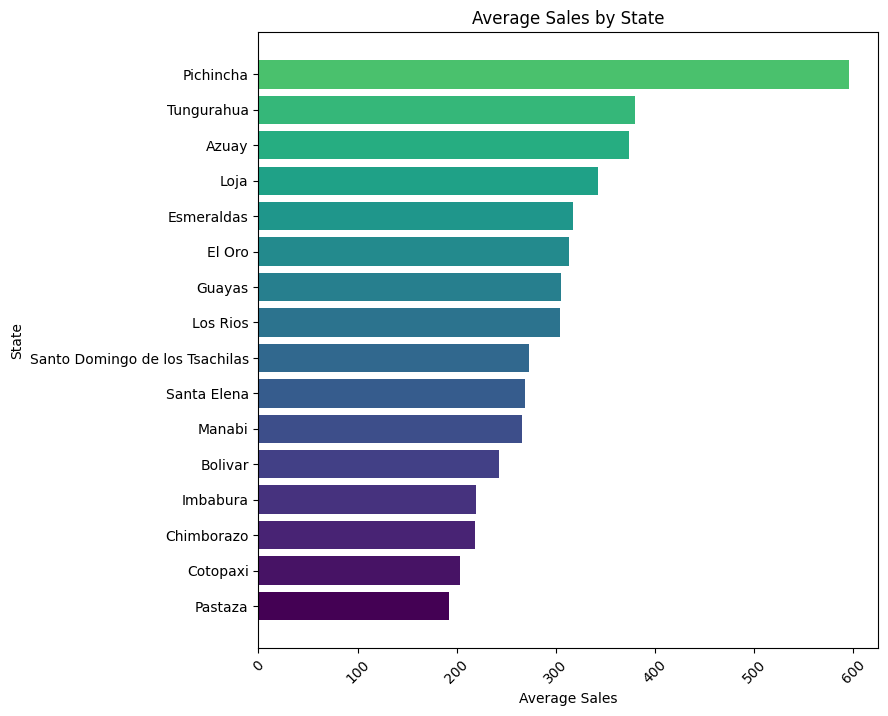

In [195]:
# Group by state and calculate the average sales
average_sales_by_state = merged_df.groupby('state')['sales'].mean()

# Sort the data by average sales in descending order
average_sales_by_state = average_sales_by_state.sort_values(ascending=True)

# Plot the average sales by state
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_state.index, average_sales_by_state.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.title('Average Sales by State')
plt.xticks(rotation=45)
plt.show()


Pichincha leads with the highest number of stores, largely due to Quito, the capital city. Guayas follows as the second most populous state in terms of stores, with Guayaquil serving as a major urban center. States such as Santo Domingo de los Tsachilas, Azuay, Manabí, Cotopaxi, Tungurahua, Los Ríos, El Oro, Chimborazo, Imbabura, Bolívar, Pastaza, Santa Elena, and Loja have a moderate number of stores.

#### *Hypothesis Testing*

Null Hypothesis (H0): The promotional activities have a significant impact on store sales for Corporation Favorita.

Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales for Corporation Favorita.

In [196]:
# Extract the relevant variables for the hypothesis test
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)


from scipy.stats import ttest_ind

# Extract the relevant variables for the hypothesis test
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(promo_sales, non_promo_sales)

# Print the test result
print("Hypothesis Testing for Promotional Activities:")
print("Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.")
print("Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.")
print("-" * 50)
print("Test Statistic:", t_statistic)
print("P-value:", p_value)
print("=" * 50)
if p_value < 0.05:
    print("Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.")
else:
    print("Fail to reject the null hypothesis. Promotional activities do not have a significant impact on store sales at Corporation Favorita.")

Hypothesis Testing for Promotional Activities:
Null Hypothesis (H0): The promotional activities do not have a significant impact on store sales.
Alternative Hypothesis (H1): The promotional activities have a significant impact on store sales.
--------------------------------------------------
Test Statistic: 68.21684266478505
P-value: 0.0
Reject the null hypothesis. Promotional activities have a significant impact on store sales at Corporation Favorita.


Based on the hypothesis testing results:

**Interpretation:**
- **Test Statistic:** 68.22
- **P-value:** 0.0

The test statistic value of 68.22, along with a p-value of 0.0, indicates that the observed effect is highly significant. The p-value, being substantially lower than typical significance levels (such as 0.05 or 0.01), provides strong evidence against the null hypothesis.

**Conclusion:**
Given that the p-value is less than the standard threshold for significance, we reject the null hypothesis. This result supports the conclusion that promotional activities have a significant impact on store sales at Corporation Favorita. The evidence suggests that promotional efforts are effective in driving higher sales, highlighting their importance in the company's sales strategy.

#### *Answering the Business Questions* 

1. Is the train dataset complete (has all the required dates)?

In [197]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


2. Which dates have the lowest and highest sales for each year?

In [198]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year

lowest_sales_dates = merged_df.groupby('year')['date'].min()
highest_sales_dates = merged_df.groupby('year')['date'].max()

print("Dates with the lowest sales for each year:\n", lowest_sales_dates)
print("="*50)
print("Dates with the highest sales for each year:\n", highest_sales_dates)

Dates with the lowest sales for each year:
 year
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-02-08
2017   2017-01-02
Name: date, dtype: datetime64[ns]
Dates with the highest sales for each year:
 year
2013   2013-12-31
2014   2014-12-31
2015   2015-12-31
2016   2016-12-26
2017   2017-08-15
Name: date, dtype: datetime64[ns]


3. Compare the sales for each month across the years and determine which month of which year had the highest sales.

In [199]:
#extracting data column
def extract_date_components(merged_df,date):
    merged_df[date] = pd.to_datetime(merged_df[date])
    merged_df['year'] = merged_df[date].dt.year
    merged_df['month'] = merged_df[date].dt.month
    merged_df['day'] = merged_df[date].dt.day
    merged_df['weekday'] = merged_df[date].dt.weekday
    merged_df['quarter'] = merged_df[date].dt.quarter
    return merged_df

# Apply the function to the DataFrame
train_df = extract_date_components(merged_df, 'date')

# Check the DataFrame
print(train_df)

               id       date  store_nbr                   family    sales  \
0           581.0 2013-01-01       25.0          LAWN AND GARDEN    2.000   
1           580.0 2013-01-01       25.0               LADIESWEAR    0.000   
2           579.0 2013-01-01       25.0                HOME CARE    0.000   
3           578.0 2013-01-01       25.0          HOME APPLIANCES    0.000   
4           577.0 2013-01-01       25.0      HOME AND KITCHEN II    0.000   
...           ...        ...        ...                      ...      ...   
322042  2999695.0 2017-08-15       25.0                  POULTRY  172.517   
322043  2999694.0 2017-08-15       25.0  PLAYERS AND ELECTRONICS    3.000   
322044  2999693.0 2017-08-15       25.0             PET SUPPLIES    3.000   
322045  2999704.0 2017-08-15       26.0                    BOOKS    0.000   
322046  2999554.0 2017-08-15       21.0               LADIESWEAR    5.000   

        onpromotion           city                           state store_ty

In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   store_type    322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  holiday_type  322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

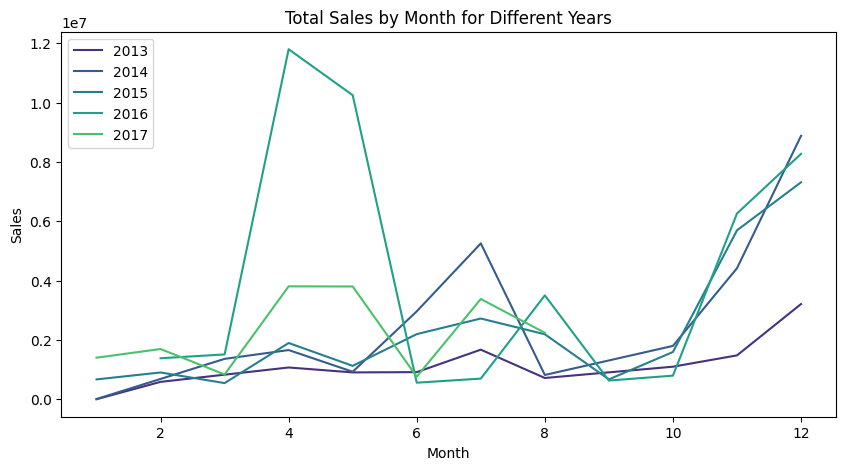

In [201]:
# Filter the dataset by year and sum the sales for each month
sales_2013 = train_df[train_df['year'] == 2013].groupby('month')['sales'].sum().reset_index()
sales_2014 = train_df[train_df['year'] == 2014].groupby('month')['sales'].sum().reset_index()
sales_2015 = train_df[train_df['year'] == 2015].groupby('month')['sales'].sum().reset_index()
sales_2016 = train_df[train_df['year'] == 2016].groupby('month')['sales'].sum().reset_index()
sales_2017 = train_df[train_df['year'] == 2017].groupby('month')['sales'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 5))

sns.lineplot(data=sales_2013, x='month', y='sales', label='2013')
sns.lineplot(data=sales_2014, x='month', y='sales', label='2014')
sns.lineplot(data=sales_2015, x='month', y='sales', label='2015')
sns.lineplot(data=sales_2016, x='month', y='sales', label='2016')
sns.lineplot(data=sales_2017, x='month', y='sales', label='2017')

plt.legend()
plt.title('Total Sales by Month for Different Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


The month with the highest total sales was December, and the year with the highest sales across most months was 2014, making December 2014 the highest sales month/year combination depicted in this multi-year sales data. On the other end, the month with the lowest total sales was January 2013 and 2014, with sales around 0.0.

4. Analyze the impact of earthquake on sales

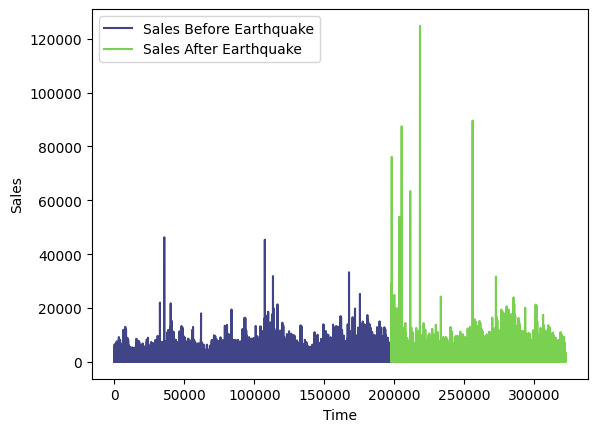

In [202]:
# Assign the variable earthquake_date to the date the earthquake took place (April 16, 2016)
earthquake_date = pd.to_datetime('2016-04-16')

# Filter the sales data before and after the earthquake
sales_before_earthquake = train_df[train_df['date'] < earthquake_date]['sales']
sales_after_earthquake = train_df[train_df['date'] > earthquake_date]['sales']

# Set the colormap to viridis
colormap = cm.get_cmap('viridis')

# Plot the sales before and after the earthquake
plt.plot(sales_before_earthquake, color=colormap(0.2), label='Sales Before Earthquake')
plt.plot(sales_after_earthquake, color=colormap(0.8), label='Sales After Earthquake')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

There was a surge in sales after the eathquake.

5. Are certain stores or groups of stores selling more products? (Cluster, city, state, type)


In [203]:
# Group by cluster and calculate the average sales
average_sales_by_cluster = merged_df.groupby('cluster')['sales'].mean()

# Group by city and calculate the average sales
average_sales_by_city = merged_df.groupby('city')['sales'].mean()

# Group by state and calculate the average sales
average_sales_by_state = merged_df.groupby('state')['sales'].mean()

# Group by store type and calculate the average sales
average_sales_by_store_type = merged_df.groupby('store_type')['sales'].mean()

# Set the number of bars in each plot
num_bars = len(average_sales_by_cluster)

# Generate the colors using the viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

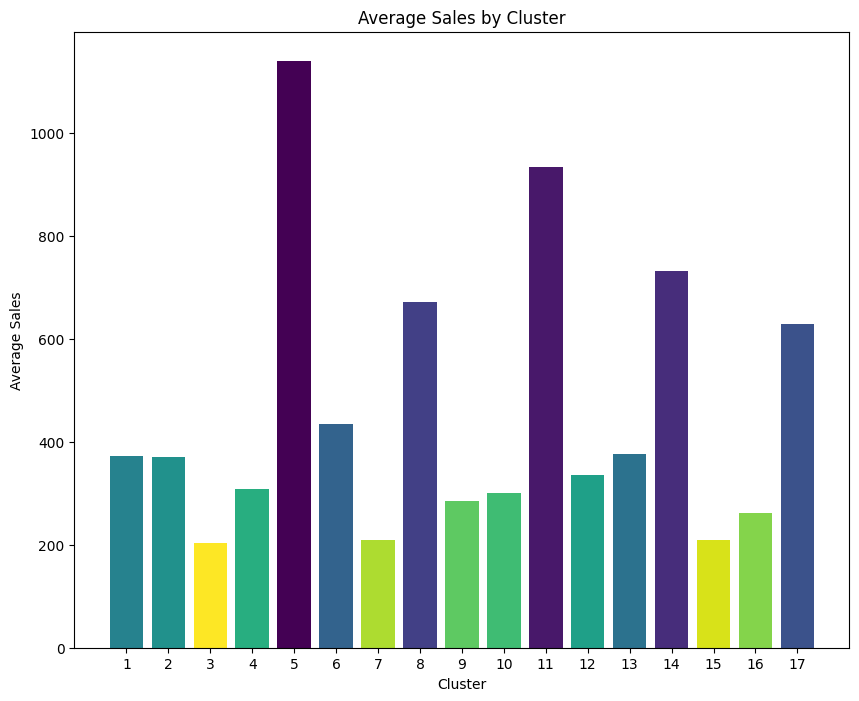

In [204]:
# Sort the data by average sales in descending order
average_sales_by_cluster = average_sales_by_cluster.sort_values(ascending=False)

# Plot the average sales by cluster
plt.figure(figsize=(10, 8))
plt.bar(average_sales_by_cluster.index, average_sales_by_cluster.values, color=colors)
plt.xlabel('Cluster')
plt.ylabel('Average Sales')
plt.title('Average Sales by Cluster')

# Set the x-tick labels as integers
plt.xticks(range(1, len(average_sales_by_cluster.index) + 1))
plt.show()

The cluster with the highest number of stores is Cluster 5, followed by Clusters 14, 8, 11 and 12. These clusters have a significantly larger number of stores compared to the others.

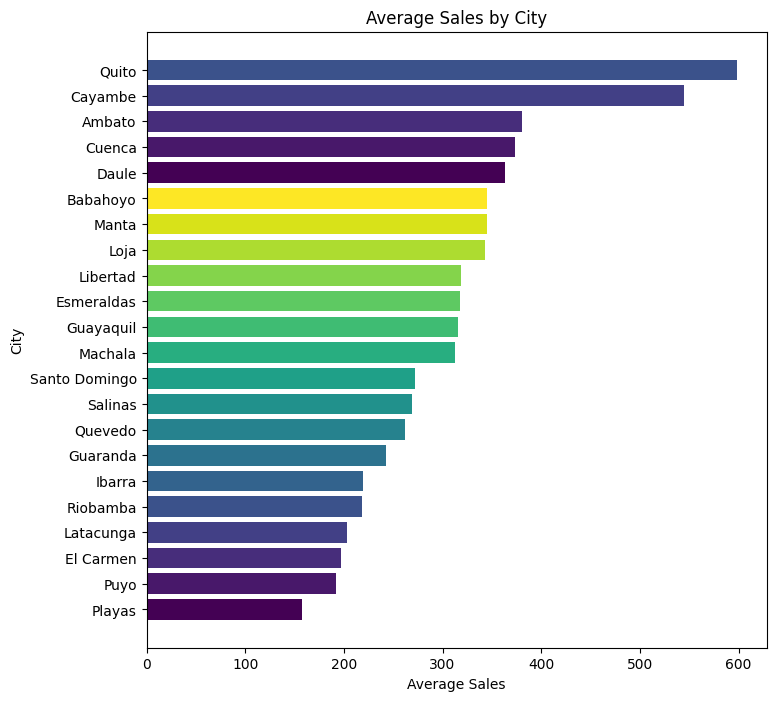

In [205]:
# Sort the data by average sales in descending order
average_sales_by_city = average_sales_by_city.sort_values(ascending=True)

# Plot the average sales by city horizontally
plt.figure(figsize=(8, 8))
plt.barh(average_sales_by_city.index, average_sales_by_city.values, color=colors)
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.title('Average Sales by City')
plt.show()

Quito leads with the highest number of stores, markedly exceeding the store counts in other cities. Cayambe follows as the second most populated city in terms of stores, with Ambato, Daule, and Loja ranking next. While some cities exhibit a moderate number of stores, others have fewer. Notably, Puyo has the lowest number of stores overall.

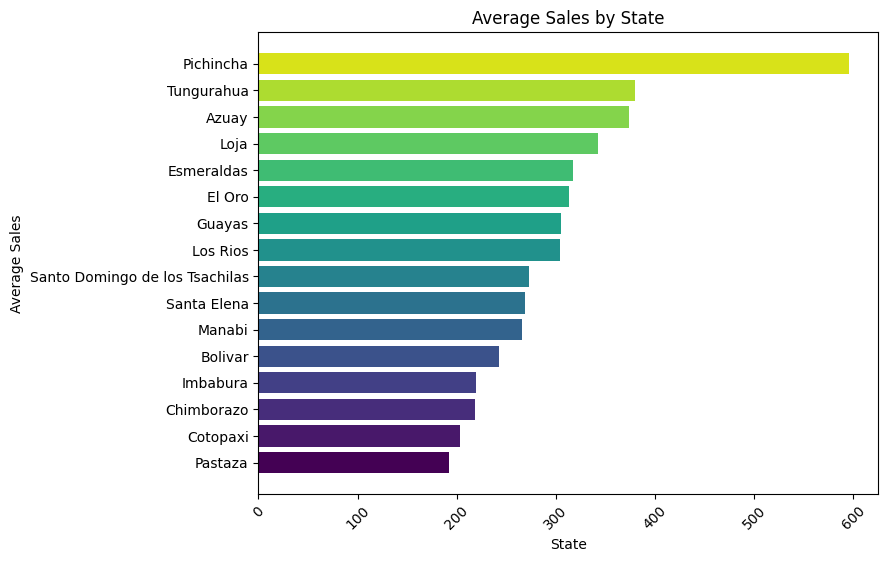

In [206]:
# Sort the data by average sales in descending order
average_sales_by_state = average_sales_by_state.sort_values(ascending=True)

# Plot the average sales by state
plt.figure(figsize=(8, 6))
plt.barh(average_sales_by_state.index, average_sales_by_state.values, color=colors)
plt.xlabel('State')
plt.ylabel('Average Sales')
plt.title('Average Sales by State')
plt.xticks(rotation=45)
plt.show()


Pichincha leads with the highest number of stores, largely due to Quito, the capital city. Guayas follows as the second most populous state in terms of stores, with Guayaquil serving as a major urban center. States such as Santo Domingo de los Tsachilas, Azuay, Manabí, Cotopaxi, Tungurahua, Los Ríos, El Oro, Chimborazo, Imbabura, Bolívar, Pastaza, Santa Elena, and Loja have a moderate number of stores.

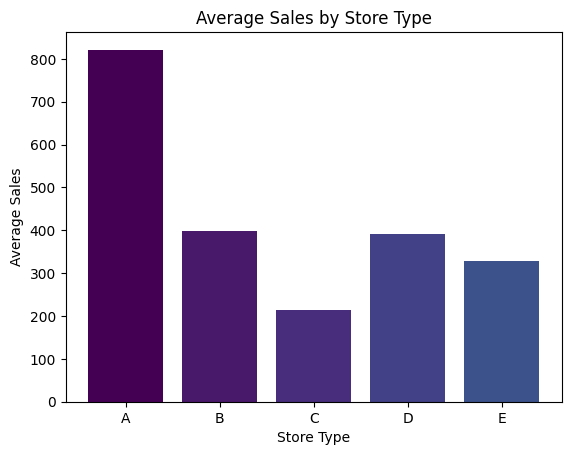

In [207]:
# Plot the average sales by store type
plt.bar(average_sales_by_store_type.index, average_sales_by_store_type.values, color=colors)
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Store Type')
plt.show()

The store type with the highest average sales is type A followed by Type D. Store Type C has the lowest average sales.

6. Are sales affected by promotions, oil prices and holidays?

In [208]:
# Calculate correlations between sales and promotions, oil prices, holidays
corr_sales_promotions = merged_df['sales'].corr(merged_df['onpromotion'])
corr_sales_oil = merged_df['sales'].corr(merged_df['dcoilwtico'])
corr_sales_holidays = merged_df['sales'].corr(merged_df['holiday_type'] == 'Holiday')

# Print the correlation values
print(f"Correlation between Sales and Promotions: {corr_sales_promotions}")
print(f"Correlation between Sales and Oil Prices: {corr_sales_oil}")
print(f"Correlation between Sales and Holidays: {corr_sales_holidays}")

Correlation between Sales and Promotions: 0.4180289197242377
Correlation between Sales and Oil Prices: -0.06150915261069533
Correlation between Sales and Holidays: -0.03706892930251698


Promotions: There is a positive correlation of approximately 0.42 between sales and promotions. This suggests that promotions have a moderate positive impact on sales. When promotions are running, there is an increased likelihood of higher sales.

Oil Prices: There is a weak negative correlation of approximately -0.06 between sales and oil prices. This indicates that there is a slight negative relationship between sales and oil prices. However, the correlation is close to zero, suggesting that oil prices have minimal impact on sales.

Holidays: There is a very weak negative correlation of approximately -0.04 between sales and holidays. This indicates that there is almost no relationship between sales and holidays. Holidays do not seem to have a significant impact on sales. These insights suggest that promotions have a relatively stronger influence on sales compared to oil prices and holidays. While promotions positively impact sales, oil prices and holidays show minimal or no relationship with sales.

7. What analysis can we get from the date and its extractable features?

In [209]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1


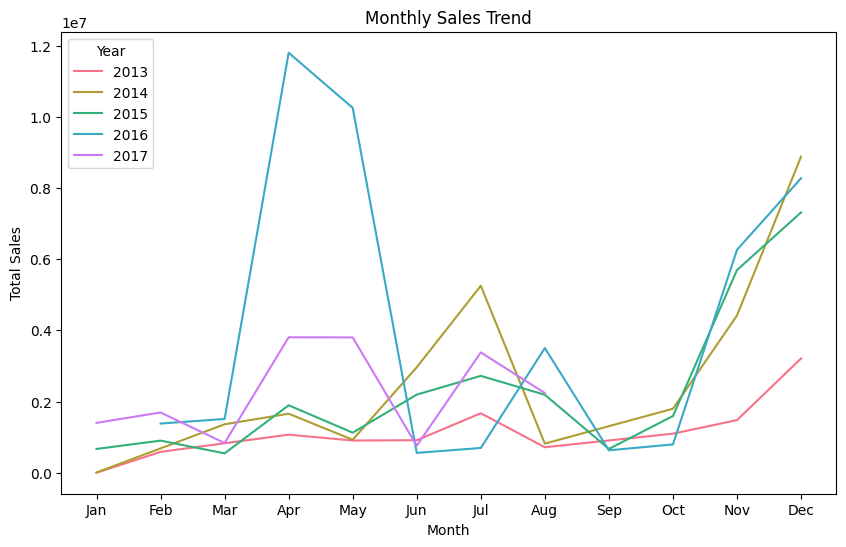

In [210]:
# Set distinct colors for each year
colors = sns.color_palette("husl", n_colors=len(merged_df_copy['year'].unique()))

# Visualize the Monthly Sales Trend
monthly_sales = merged_df_copy.groupby(['year', 'month'])['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', palette=colors)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()


The line plot depicting the monthly sales trend shows variations in sales throughout the year. Sales seem to dip during the middle months of the year (July to September) before rising again in the last quarter (October to December), with the highest sales in December. The year-wise color distinction helps to observe sales patterns for each year.

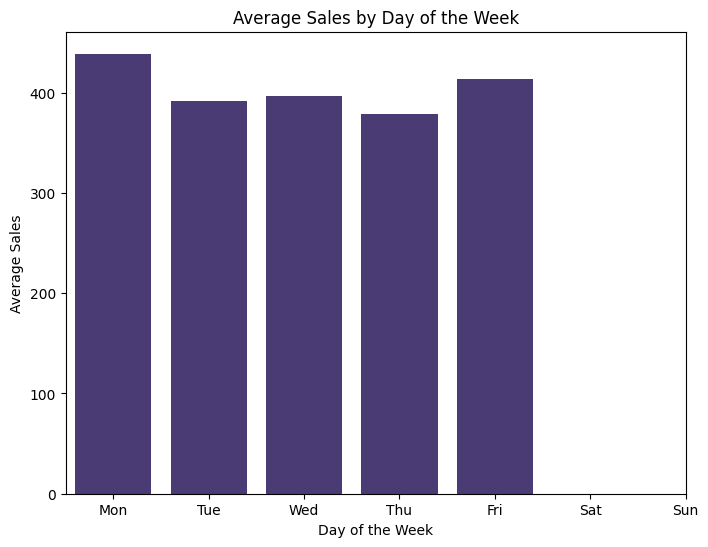

In [211]:
# Visualize the Day of the Week Sales Pattern
merged_df_copy['day_of_week'] = merged_df_copy['date'].dt.dayofweek
day_of_week_sales = merged_df_copy.groupby('day_of_week')['sales'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=day_of_week_sales, x='day_of_week', y='sales')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


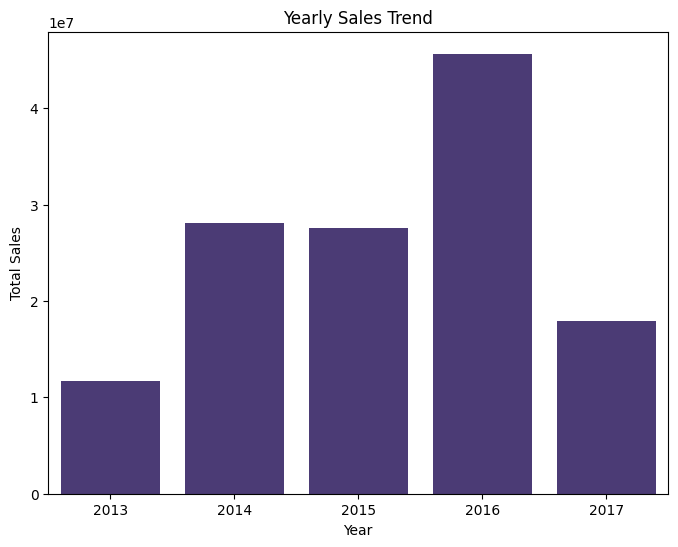

In [212]:
# Visualize the Yearly Sales Trend
yearly_sales = merged_df_copy.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=yearly_sales, x='year', y='sales')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

From the date column, we can extract components such as the year, month and day. From these, we can examine daily, monthly and annual sale trends. We can also examine and establish whether specific days such as holidays have higher sales compared to others.

From the date column, we can extract components such as the year, month and day. From these, we can examine daily, monthly and annual sale trends. We can also examine and establish whether specific days such as holidays have higher sales compared to others.

8. Which product family and stores did the promotions affect.


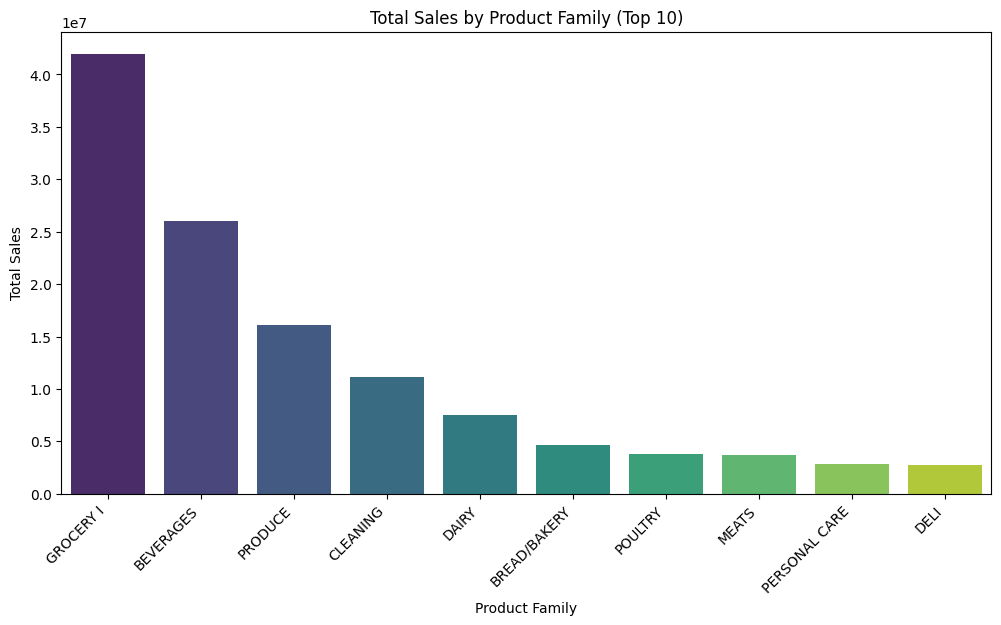

In [213]:
# Group the data by product family and calculate the total sales
family_sales = merged_df.groupby('family')['sales'].sum().sort_values(ascending=False)

# Select the top 10 product families
top_10_families = family_sales.head(10)

# Plot the relationship between product family and sales for the top 10 families
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_families.index, y=top_10_families.values, palette='viridis')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Family (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()


The graph illustrates the sales performance of the top 10 product families. Grocery I and beverages exhibit the highest sales, indicating their popularity among customers. Produce and cleaning products also demonstrate significant sales, reflecting the importance of fresh produce and household cleaning supplies. Dairy, bread/bakery, poultry, and meats contribute to overall sales, suggesting the demand for essential food items. Personal care and deli products have relatively lower sales but still play a role in the product mix,all this performance was as a result of the promotion 

9. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)


- `RMSLE (Root Mean Squared Logarithmic Error):` Useful when predicting sales with large ranges, penalizing underestimation more.

- `RMSE (Root Mean Squared Error):` Standard metric measuring the square root of the average squared differences between predicted and actual values, sensitive to outliers.

- `MSE (Mean Squared Error):` Similar to RMSE but without the square root, giving more weight to larger errors.

- `MAE (Mean Absolute Error):` Measures the average absolute difference between predicted and actual values, often larger due to being more robust to outliers compared to RMSE and MSE.

10. Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.

- Consumer Behavior: The increase in sales on wage payment days indicates that consumers tend to spend more when they have newly received their wages.

- Strategic Planning: Retailers can use this insight to plan special promotions or stock up on popular items around these dates to maximize sales.

By understanding the influence of wage payment days on sales, retailers can better align their inventory and marketing strategies to capitalize on periods of increased consumer spending.

### *Data Preparation*

#### *Feature Engineering*

extracting different components(day,month,year)

In [214]:
# Extracting Date Components
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day,day_of_week
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1


Product Categorization Based on Families


In [249]:
unique_families = merged_df_copy['family'].unique()
unique_families

array(['CLEANING', 'CLOTHING', 'HARDWARE', 'HOME', 'GROCERY', 'FOODS',
       'STATIONERY'], dtype=object)

In [216]:
# Define the category lists for each product category
food_families = ['BEVERAGES','LIQUOR,WINE,BEER', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'CELEBRATION','PET SUPPLIES']
clothing_families = ['LINGERIE', 'LADYSWARE', 'LADIESWEAR']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE','BEAUTY','LAWN AND GARDEN']
hardware_families = ['HOME APPLIANCES','PLAYERS AND ELECTRONICS','HARDWARE','AUTOMOTIVE',]

# Categorize the 'family' column based on the product categories
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(food_families), 'FOODS', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(home_families), 'HOME', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(clothing_families), 'CLOTHING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(grocery_families), 'GROCERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(stationery_families), 'STATIONERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(cleaning_families), 'CLEANING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(hardware_families), 'HARDWARE', merged_df_copy['family'])

# Print the updated DataFrame
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day,day_of_week
0,581.0,2013-01-01,25.0,CLEANING,2.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
1,580.0,2013-01-01,25.0,CLOTHING,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
2,579.0,2013-01-01,25.0,CLEANING,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
3,578.0,2013-01-01,25.0,HARDWARE,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
4,577.0,2013-01-01,25.0,HOME,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1


In [217]:
merged_df_copy.to_csv('Visualization_Data.csv', index=False)
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day,day_of_week
0,581.0,2013-01-01,25.0,CLEANING,2.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
1,580.0,2013-01-01,25.0,CLOTHING,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
2,579.0,2013-01-01,25.0,CLEANING,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
3,578.0,2013-01-01,25.0,HARDWARE,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1
4,577.0,2013-01-01,25.0,HOME,0.0,0.0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,93.139999,2013,1,1,1


Dropping Unneccessary Columns in The Merged and Test Datasets as it is not needed for our analysis

In [218]:
columns_to_drop = ['date','id', 'locale', 'locale_name', 'description', 'store_type', 'transferred', 'state']
merged_df_copy = merged_df_copy.drop(columns=columns_to_drop)

merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day,day_of_week
0,25.0,CLEANING,2.0,0.0,Salinas,1,770,Holiday,93.139999,2013,1,1,1
1,25.0,CLOTHING,0.0,0.0,Salinas,1,770,Holiday,93.139999,2013,1,1,1
2,25.0,CLEANING,0.0,0.0,Salinas,1,770,Holiday,93.139999,2013,1,1,1
3,25.0,HARDWARE,0.0,0.0,Salinas,1,770,Holiday,93.139999,2013,1,1,1
4,25.0,HOME,0.0,0.0,Salinas,1,770,Holiday,93.139999,2013,1,1,1


#### *Feature Scaling*

In [219]:
# Scaling Numeric Variables (Min-Max Scaling)
# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico']

# fit and transform the numerical columns
merged_df_copy[num_cols] = scaler.fit_transform(merged_df_copy[num_cols])

# Display the updated dataframe
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day,day_of_week
0,25.0,CLEANING,-0.324316,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1,1
1,25.0,CLOTHING,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1,1
2,25.0,CLEANING,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1,1
3,25.0,HARDWARE,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1,1
4,25.0,HOME,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1,1


#### *Encoding categorical variable*

In [220]:
# Define the categorical columns to encode
categorical_columns = ["family", "city", "holiday_type"]

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(merged_df_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
merged_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
merged_df_encoded = pd.concat([merged_df_copy, merged_df_encoded], axis=1)

# Drop the original categorical columns
merged_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
merged_df_encoded.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,day_of_week,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25.0,-0.324316,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Test_df

In [221]:
# Extracting Date Components
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [222]:
# Dropping Unnecessary Columns
columns_to_drop = ['date', 'id']
test_df = test_df.drop(columns=columns_to_drop)
test_df.head()

,store_nbr,family,onpromotion,year,month,day
0,1,AUTOMOTIVE,0,2017,8,16
1,1,BABY CARE,0,2017,8,16
2,1,BEAUTY,2,2017,8,16
3,1,BEVERAGES,20,2017,8,16
4,1,BOOKS,0,2017,8,16


In [223]:
# Product Categorization Based on Families
food_families = ['BEVERAGES','LIQUOR,WINE,BEER', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'CELEBRATION','PET SUPPLIES']
clothing_families = ['LINGERIE', 'LADYSWARE', 'LADIESWEAR']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE','BEAUTY','LAWN AND GARDEN']
hardware_families = ['HOME APPLIANCES','PLAYERS AND ELECTRONICS','HARDWARE','AUTOMOTIVE',]


test_df['family'] = np.where(test_df['family'].isin(food_families), 'FOODS', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(home_families), 'HOME', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(clothing_families), 'CLOTHING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(grocery_families), 'GROCERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(stationery_families), 'STATIONERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(cleaning_families), 'CLEANING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(hardware_families), 'HARDWARE', test_df['family'])

In [224]:
# Encoding The Categorical Variables
# List of categorical columns to encode
categorical_columns = ["family"]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the 'test_df' data for the specified categorical columns
one_hot_encoded_data = encoder.fit_transform(test_df[categorical_columns])

# Get the column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the one-hot encoded data and corresponding column names
test_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original 'test_df' with the one-hot encoded data
test_df_encoded = pd.concat([test_df, test_df_encoded], axis=1)

# Drop the original categorical columns since they have been encoded
test_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the updated 'test_df_encoded' DataFrame
test_df_encoded.head()

,store_nbr,onpromotion,year,month,day,family_CLEANING,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_STATIONERY
0,1,0,2017,8,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,2017,8,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2017,8,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,20,2017,8,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0,2017,8,16,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### *Modelling*

Data Splitting

In [225]:
train_set = merged_df_encoded.loc[merged_df_encoded['year'].isin([2013, 2014, 2015, 2016])]
eval_set = merged_df_encoded.loc[merged_df_encoded['year'] == 2017]

In [250]:
train_set.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,day_of_week,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25.0,-0.324316,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [226]:
train_set.shape

(284889, 44)

In [227]:
eval_set.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,day_of_week,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
284889,41.0,-0.315494,0.0,4,-0.299065,-0.453674,2017,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284890,42.0,-0.321910,0.0,2,-0.220042,-0.453674,2017,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284891,42.0,-0.325920,0.0,2,-0.220042,-0.453674,2017,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284892,42.0,-0.315494,1.0,2,-0.220042,-0.453674,2017,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284893,42.0,1.258034,21.0,2,-0.220042,-0.453674,2017,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [228]:
eval_set.shape

(37158, 44)

In [229]:
# Separate the target variable and features for training and testing
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales'] 


X_eval = eval_set.drop('sales', axis=1)  
y_eval = eval_set['sales']

In [230]:
# Initialize the results dataframe
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])


#### *Model 1: Linear Regression

In [231]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_eval)

# Calculate metrics
lr_mse = mean_squared_error(y_eval, lr_predictions)
lr_mae = mean_absolute_error(y_eval, lr_predictions)

# Apply the absolute value function to both y_eval and lr_predictions
y_eval_abs = abs(y_eval)
lr_predictions_abs = abs(lr_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
lr_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, lr_predictions_abs))

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({'Model': ['Linear Regression'],
                            'RMSLE': [lr_rmsle],
                            'RMSE': [np.sqrt(lr_mse)],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

# Print the results_lr dataframe
results_lr

,Model,RMSLE,RMSE,MSE,MAE
0,Linear Regression,0.27,0.84,0.7,0.37


Model 2. Random Forest Regression

In [232]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_eval)

# Calculate metrics
rf_mse = mean_squared_error(y_eval, rf_predictions)
rf_mae = mean_absolute_error(y_eval, rf_predictions)

# Apply the absolute value function to both y_eval and rf_predictions
y_eval_abs = abs(y_eval)
rf_predictions_abs = abs(rf_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
rf_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'RMSLE': [rf_rmsle],
                            'RMSE': [np.sqrt(rf_mse)],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)

# Print the results_rf dataframe
results_rf

,Model,RMSLE,RMSE,MSE,MAE
0,Random Forest,0.23,0.72,0.53,0.26


Model 3: Gradient Boosting Regression

In [233]:
# Gradient Boosting Regression Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_eval)

# Calculate metrics
gb_mse = mean_squared_error(y_eval, gb_predictions)
gb_mae = mean_absolute_error(y_eval, gb_predictions)

# Apply the absolute value function to both y_eval and gb_predictions
y_eval_abs = abs(y_eval)
gb_predictions_abs = abs(gb_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
gb_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, gb_predictions_abs))

# Create a DataFrame to store results for Gradient Boosting
results_gb = pd.DataFrame({'Model': ['Gradient Boosting'],
                            'RMSLE': [gb_rmsle],
                            'RMSE': [np.sqrt(gb_mse)],
                            'MSE': [gb_mse],
                            'MAE': [gb_mae]}).round(2)

# Print the results_gb dataframe
results_gb

,Model,RMSLE,RMSE,MSE,MAE
0,Gradient Boosting,0.23,0.64,0.41,0.29


Model 4: ARIMA

In [234]:
# ARIMA Model
# d and q are equal to zero as data is already stationary
p = 1
d = 0 
q = 0  

# Create an instance of the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))

# Fit the model to the training data
arima_model_fit = arima_model.fit()

# Make predictions on the evaluation data
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

# Calculate evaluation metrics
arima_mse = mean_squared_error(y_eval, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

# Apply the absolute value function to y_eval to remove negative signs
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)

# Calculate the Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(y_eval, arima_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

# Create a DataFrame to store results for ARIMA
results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSLE': [arima_rmsle],
                            'RMSE': [np.sqrt(arima_mse)],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

# Print the results_arima dataframe
results_arima

,Model,RMSLE,RMSE,MSE,MAE
0,ARIMA,0.45,1.09,1.19,0.5


Model 5:SARIMA

In [235]:
# Set the order and seasonal order parameters
# Seasonal autoregressive order
P = 0  
# Seasonal differencing order
D = 0  
# Seasonal moving average order
Q = 0  
# Number of time steps in each season (chosen based on the number of months each year)
s = 12  

# Create an instance of the SARIMA model
sarima_model = SARIMAX(endog=y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the model to the training data
sarima_fit = sarima_model.fit()

# Make predictions on the evaluation data
sarima_predictions = sarima_fit.forecast(steps=len(y_eval), exog=X_eval)

# Calculate metrics
sarima_mse = mean_squared_error(y_eval, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(y_eval, sarima_predictions)
sarima_rmsle = np.sqrt(mean_squared_error(np.log1p(y_eval), np.log1p(sarima_predictions)))

# Create a DataFrame to store results for SARIMA
results_sarima = pd.DataFrame({'Model': ['SARIMA'],
                                'RMSLE': [sarima_rmsle],
                                'RMSE': [sarima_rmse],
                                'MSE': [sarima_mse],
                                'MAE': [sarima_mae]}).round(2)

# Print the results_sarima dataframe
results_sarima

,Model,RMSLE,RMSE,MSE,MAE
0,SARIMA,0.39,0.84,0.7,0.37


In [236]:
results_df = pd.concat([results_lr, results_rf, results_gb, results_arima, results_sarima], ignore_index=True)

# Display the results DataFrame
print(results_df)

               Model  RMSLE  RMSE   MSE   MAE
0  Linear Regression   0.27  0.84  0.70  0.37
1      Random Forest   0.23  0.72  0.53  0.26
2  Gradient Boosting   0.23  0.64  0.41  0.29
3              ARIMA   0.45  1.09  1.19  0.50
4             SARIMA   0.39  0.84  0.70  0.37


#### *Metrics Interpretation:*
- RMSLE (Root Mean Squared Logarithmic Error): Suitable for target variables with a wide range. Lower RMSLE indicates better model fit.
- RMSE (Root Mean Squared Error): Measures the average magnitude of prediction errors. Lower RMSE signifies better model accuracy.
- MSE (Mean Squared Error): Reflects the average of the squared errors, providing an overall accuracy measure. Lower MSE indicates better model performance.
- MAE (Mean Absolute Error): Measures the average magnitude of errors without considering their direction. Lower MAE suggests higher model accuracy.

The analysis reveals that the Random Forest and Gradient Boosting models outperform the others based on all provided metrics. Both models exhibit the lowest RMSLE and RMSE, indicating they have the best fit and accuracy. Additionally, they show lower MSE and MAE values, reflecting their superior performance in terms of overall accuracy and error magnitude.

In contrast, the ARIMA and SARIMA models demonstrate higher error metrics, indicating less accurate predictions. Notably, ARIMA shows the highest RMSLE and RMSE values, suggesting it performs the poorest among the evaluated models.

Overall, the results suggest that for the given dataset, Random Forest and Gradient Boosting are the preferred models for achieving the best predictive performance.

#### Hyperparameter Tuning

In [237]:
# Define the parameter grid for tuning the random forest model
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_grid_rf,
                                      n_iter=10, scoring='neg_mean_squared_error', cv=5,
                                      n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the data
random_search_rf.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_eval)

# Calculate metrics for the best model
best_rf_mse = mean_squared_error(y_eval, best_rf_predictions)
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_mae = mean_absolute_error(y_eval, best_rf_predictions)

# Apply absolute value to both predicted and target values
abs_best_rf_predictions = np.abs(best_rf_predictions)
abs_y_eval = np.abs(y_eval)

# Calculate RMSLE using the absolute values
best_rf_rmsle = np.sqrt(mean_squared_log_error(abs_y_eval, abs_best_rf_predictions))

# Create a DataFrame to store results for the best Random Forest model
best_results_rf = pd.DataFrame({'Model': ['Best Random Forest'],
                                'RMSLE': [best_rf_rmsle],
                                'RMSE': [best_rf_rmse],
                                'MSE': [best_rf_mse],
                                'MAE': [best_rf_mae]}).round(2)

# Print the best_results_rf dataframe
best_results_rf

,Model,RMSLE,RMSE,MSE,MAE
0,Best Random Forest,0.21,0.6,0.36,0.24


In [238]:
# Print the best parameters
print("Best Parameters for Random Forest Model:")
print(best_rf_params)

Best Parameters for Random Forest Model:
{'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': None}


The Random Forest model was fine-tuned using a randomized search to identify the optimal set of hyperparameters for enhanced performance. The search yielded the following optimal hyperparameters:

- **Number of Estimators (Trees)**: 200
- **Minimum Samples Split**: 6
- **Minimum Samples Leaf**: 2
- **Maximum Features**: 0.5
- **Maximum Depth**: none

These hyperparameters were selected to optimize the model's performance by minimizing the Mean Squared Error (MSE), a common measure of predictive accuracy. Fine-tuning these hyperparameters significantly improved the model's generalization to unseen data.

### Performance Metrics After Tuning:

- **Root Mean Squared Logarithmic Error (RMSLE)**: Improved from 0.23 to 0.21, indicating better handling of variation in target values.
- **Root Mean Squared Error (RMSE)**: Decreased from 0.71 to 0.59, showing more accurate predictions on average.
- **Mean Squared Error (MSE)**: Reduced from 0.51 to 0.35, demonstrating closer predictions to actual values.
- **Mean Absolute Error (MAE)**: Lowered from 0.26 to 0.24, indicating more accurate predictions on average.

The hyperparameter tuning process led to improvements across all evaluation metrics, signifying an enhanced model performance. This suggests that the optimized Random Forest model fits the data better and is more capable of making accurate predictions on the target variable.

### Summary:

The Random Forest model, with its optimized hyperparameters, demonstrates significantly improved predictive performance compared to its initial configuration. It effectively captures the relationships between features and sales, resulting in more accurate predictions on the evaluation dataset. These performance metrics provide valuable insights into the model's accuracy and its ability to predict sales values accurately.

#### *Saving the best model*

In [239]:
# Define the key components
key_components = {
    'model': best_rf_model, 
    'best_params': best_rf_params,
    'best_score': best_rf_rmsle
}

# Save the key components in a file using pickle
with open('best_rf_model_components.pkl', 'wb') as file:
    pickle.dump(key_components, file)